In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
clientes = pd.read_csv('data\e-comerce_Olist_dataset\olist_customers_dataset.csv')
geolocalizacion = pd.read_csv('data\e-comerce_Olist_dataset\olist_geolocation_dataset.csv')
items = pd.read_csv('data\e-comerce_Olist_dataset\olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])
metodo_de_pago = pd.read_csv('data\e-comerce_Olist_dataset\olist_order_payments_dataset.csv')
reviews = pd.read_csv('data\e-comerce_Olist_dataset\olist_order_reviews_dataset.csv', parse_dates=['review_creation_date', 'review_answer_timestamp'])
ordenes = pd.read_csv('data\e-comerce_Olist_dataset\olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'])
productos = pd.read_csv('data\e-comerce_Olist_dataset\olist_products_dataset.csv')
vendedores = pd.read_csv('data\e-comerce_Olist_dataset\olist_sellers_dataset.csv')
productos_info = pd.read_csv('data\e-comerce_Olist_dataset\product_category_name_translation.csv')

In [18]:
def nulls_percentage(df):
    rows_null = df.isna().sum().values.max()
    total_rows = df.shape[0]

    return round((rows_null / total_rows) * 100, 2)

In [25]:
reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [26]:
review_whitout_comment = reviews.drop(columns=['review_comment_title','review_comment_message'])
review_whitout_comment.head(3)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24


In [27]:
dataframes_null_report = {
    'df_names': [
        'customer',
        'geolocation',
        'item',
        'order',
        'payment',
        'product',
        'productos_info',
        'review',
        'review_whitout_comment',
        'seller'
    ],
    'total_rows': [
        clientes.shape[0],
        geolocalizacion.shape[0],
        items.shape[0],
        ordenes.shape[0],
        metodo_de_pago.shape[0],
        productos.shape[0],
        productos_info.shape[0],
        reviews.shape[0],
        review_whitout_comment.shape[0],
        vendedores.shape[0]
    ],
    'nulls_percentage': [
        nulls_percentage(clientes),
        nulls_percentage(geolocalizacion),
        nulls_percentage(items),
        nulls_percentage(ordenes),
        nulls_percentage(metodo_de_pago),
        nulls_percentage(productos),
        nulls_percentage(productos_info),
        nulls_percentage(reviews),
        nulls_percentage(review_whitout_comment),
        nulls_percentage(vendedores)
    ]
}

In [28]:
nulls_report = pd.DataFrame(dataframes_null_report)
nulls_report

,df_names,total_rows,nulls_percentage
0,customer,99441,0.00
1,geolocation,19015,0.00
2,item,112650,0.00
3,order,99441,2.98
4,payment,103886,0.00
5,product,32951,1.85
6,productos_info,71,0.00
7,review,99224,88.34
8,review_whitout_comment,99224,0.00
9,seller,3095,0.00


In [56]:
only_nulls = nulls_report[nulls_report['nulls_percentage'] != 0]
only_nulls

,df_names,total_rows,nulls_percentage
3,order,99441,2.98
5,product,32951,1.85
7,review,99224,88.34


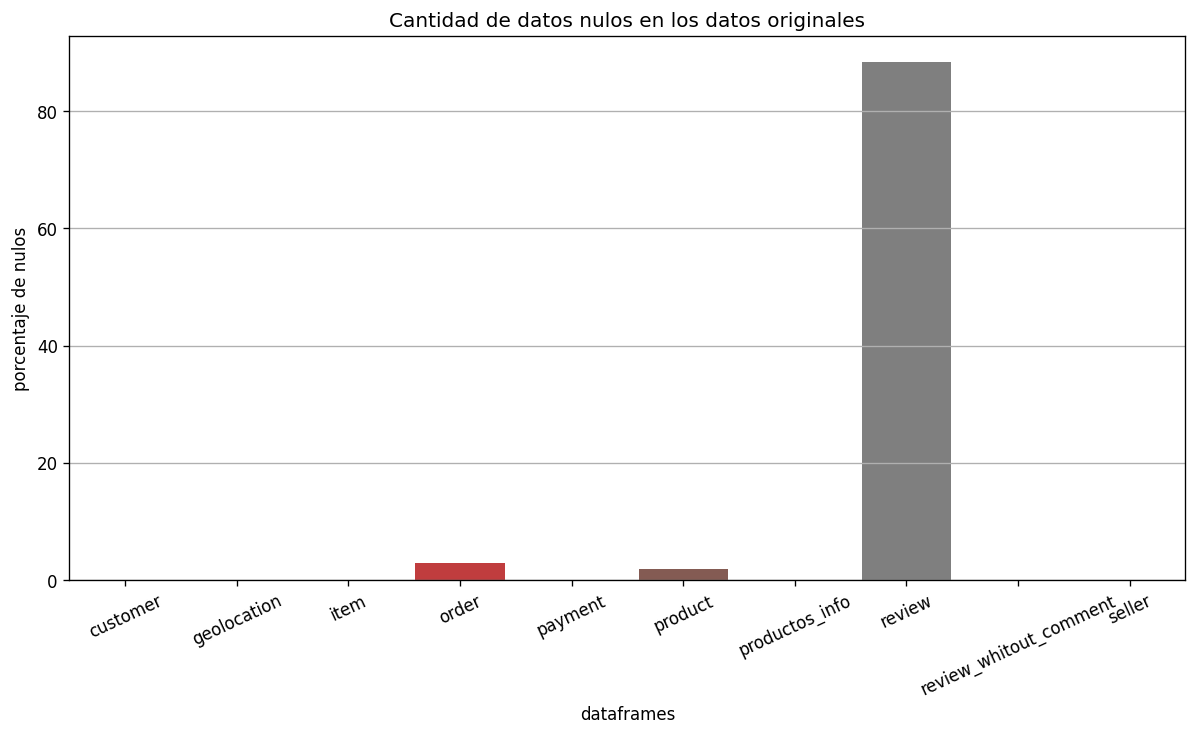

In [54]:
plt.figure(figsize=(12,6), dpi=120)
plt.grid()
sns.barplot(data=nulls_report, x='df_names', y='nulls_percentage')
plt.xticks(rotation=25)
plt.xlabel('dataframes')
plt.ylabel('porcentaje de nulos')
plt.title('Cantidad de datos nulos en los datos originales')
plt.show()

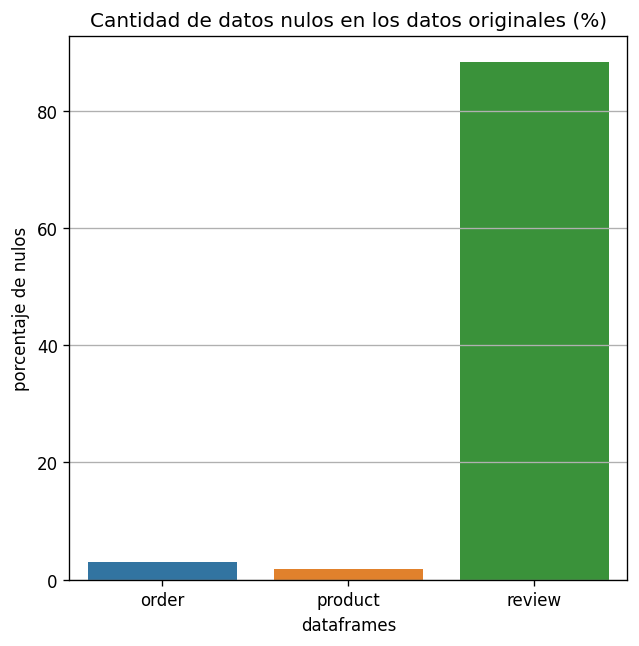

In [63]:
plt.figure(figsize=(6,6), dpi=120)
plt.grid()
sns.barplot(data=only_nulls, x='df_names', y='nulls_percentage')
# plt.xticks(rotation=25)
plt.xlabel('dataframes')
plt.ylabel('porcentaje de nulos')
plt.title('Cantidad de datos nulos en los datos originales (%)')
plt.show()